# FINAL PROJECT
### Emily Bederov - 215025255, Shira lavi - 216006395 & Noam Farhi - 215486598

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/FINAL-PROJECT---TOMATO-YIELD/main/tomatoes.csv')

In [192]:
df.head()

,id,Average Plant Size,Bee_1 Pollination Activity,bee_2 Pollination Activity,bee_3 Pollination Activity,bee_4 Pollination Activity,Maximum Upper Bloom Temperature,Minimum Upper Bloom Temperature,Average Upper Bloom Temperature,Maximum Lower Bloom Temperature,Minimum Lower Bloom Temperature,Average Lower Bloom Temperature,Total Rainy Days,Proportion of Rainy Days,fruit_set,mass_of_fruit,average_seeds,tomato_yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               15289 non-null  int64  
 1   Average Plant Size               15289 non-null  float64
 2   Bee_1 Pollination Activity       15289 non-null  float64
 3   bee_2 Pollination Activity       15289 non-null  float64
 4   bee_3 Pollination Activity       15289 non-null  float64
 5   bee_4 Pollination Activity       15289 non-null  float64
 6   Maximum Upper Bloom Temperature  15289 non-null  float64
 7   Minimum Upper Bloom Temperature  15289 non-null  float64
 8   Average Upper Bloom Temperature  15289 non-null  object 
 9   Maximum Lower Bloom Temperature  15289 non-null  float64
 10  Minimum Lower Bloom Temperature  15289 non-null  float64
 11  Average Lower Bloom Temperature  15289 non-null  float64
 12  Total Rainy Days  

In [194]:
df.shape

(15289, 18)

In [195]:
#DataSet Description
info = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/FINAL-PROJECT---TOMATO-YIELD/main/Dataset%20Description.csv')
info

,Column,Description
0,Average Plant Size (m²),The typical size (area) occupied by a single ...
1,Bee_1 Pollination Activity (bees/m²/min),The average number of bees (from type 1) visit...
2,bee_2 Pollination Activity (bees/m²/min),The average number of bees (from type 2) visit...
3,bee_3 Pollination Activity (bees/m²/min),The average number of bees (from type 3) visit...
4,bee_4 Pollination Activity (bees/m²/min),The average number of bees (from type 4) visit...
5,Maximum Upper Bloom Temperature (°C),The highest recorded daily air temperature wit...
6,Minimum Upper Bloom Temperature (°C),The lowest recorded daily air temperature with...
7,Average Upper Bloom Temperature (°C),The average daily air temperature within the o...
8,Maximum Lower Bloom Temperature (°C),The highest recorded daily air temperature bel...
9,Minimum Lower Bloom Temperature (°C),The lowest recorded daily air temperature belo...


### lets check "Average Upper Bloom Temperature"

In [196]:
df["Average Upper Bloom Temperature"]

0        58.2
1        58.2
2        71.9
3        64.7
4        64.7
         ... 
15284    64.7
15285    71.9
15286    64.7
15287    58.2
15288    64.7
Name: Average Upper Bloom Temperature, Length: 15289, dtype: object

## We can sense a problem -> the data looks numarical -> 
## Lets check for "MISSING DATA"
[Effective Strategies for Handling Missing Values in Data Analysis](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

In [197]:
# We have noticed values in our DateSet with the value 'missing' lets search them
def find_missing(df):
    missing_values = []
    for column in df.columns:
        missing_in_column = df[column] == 'missing'
        if missing_in_column.any():
            for row in missing_in_column[missing_in_column].index:
                missing_values.append((row, column))
                
    return missing_values

missing_val = find_missing(df)

for row, column in missing_val:
    print(f'Missing values found at Row: {row}, Column: {column}')

Missing values found at Row: 1052, Column: Average Upper Bloom Temperature
Missing values found at Row: 3056, Column: Average Upper Bloom Temperature
Missing values found at Row: 3067, Column: Average Upper Bloom Temperature
Missing values found at Row: 4728, Column: Average Upper Bloom Temperature
Missing values found at Row: 4743, Column: Average Upper Bloom Temperature


### We also want to check for negative values, they might be 'missing values'.besides the tempurture all the other data has to be positive, lets check it out.

In [198]:
def find_negative(df):
    negative_values = []
    for index, row in df.iterrows():
        if 'missing' in row.values:
            continue  # Skip rows with 'missing'
        for column in df.columns:
            try:
                if float(row[column]) < 0:
                    negative_values.append((index, column, row[column]))
            except (ValueError, TypeError):
                # Skip if conversion to float fails
                continue
    return negative_values

negative_val = find_negative(df)

for row, column, value in negative_val:
    print(f'Negative value found at Row: {row}, Column: {column}, Value: {value}')

Negative value found at Row: 11555, Column: Maximum Upper Bloom Temperature, Value: -86.0
Negative value found at Row: 11556, Column: Maximum Upper Bloom Temperature, Value: -100.0


### Temperture can be negative, its not a missing values, but is seems odd, due to the fact its very low -> might be an outlier.
### This face makes us want to replace the missing values with the mean of the central 90% of the data, to exclude values that may be extreme

### There are 5 missing values -> We'll handle them:
* we'll use - Mean Imputation
* [ML | Handling Missing Values](https://www.geeksforgeeks.org/ml-handling-missing-values/?ref=lbp)
-> The approach we chose from the article above is to use fillna() : Fills missing values with specific values, means, medians, or other calculated values.
* [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [199]:
df["Average Upper Bloom Temperature"] = df["Average Upper Bloom Temperature"].replace('missing', np.nan)
#check replacment
print(df["Average Upper Bloom Temperature"].isna().sum())

5


In [200]:
#change & check data type
df["Average Upper Bloom Temperature"] = pd.to_numeric(df["Average Upper Bloom Temperature"], errors='coerce')
print(df["Average Upper Bloom Temperature"].dtypes)

float64


### Replace nan values with method -> mean imputation the central 90% of the data, excluding the extreme 5% tails on both ends

In [201]:
# Calculate the 5th and 95th percentiles
percentile_5 = df["Average Upper Bloom Temperature"].quantile(0.05)
percentile_95 = df["Average Upper Bloom Temperature"].quantile(0.95)

# Filter the data to include only values between the 5th and 95th percentiles
filtered_data = df[(df["Average Upper Bloom Temperature"] >= percentile_5) & (df["Average Upper Bloom Temperature"] <= percentile_95)]

filtered_mean = filtered_data["Average Upper Bloom Temperature"].mean()

# Replace the missing values with the filtered mean
df["Average Upper Bloom Temperature"] = df["Average Upper Bloom Temperature"].fillna(filtered_mean)

In [202]:
print(df["Average Upper Bloom Temperature"].isna().sum())

0


## Now we know that all of our Data is numerical - int\float

# Numerical and Categorical varibles
[Categorical Data vs Numerical Data: The Differences](https://www.questionpro.com/blog/categorical-data-vs-numerical-data/)

* Numerical data - includes numbers -> int, float
* Categorical data - includes objects, strings -> exclude: int, float
* but as we saw when we have objects we need to check them ->
## IN TOTAL OUR DATA IS ALL NUMERICAL

In [203]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Number of Numerical variables: {len(numerical_vars)}")

Number of Numerical variables: 18


# LETS ANALYAZE STATISTICS OF OUR DATA
### why to choose describe() method?

1. count - refers to the number of non-null entries in each column, which they represent the valid data in the Dataset.
2. mean - refers to the avarage of the non-null values in the dataset.
3. standard deviation - Describes how much the data points spread out or vary from the average.
4. min - smallest value in each collumn
5. max - largest values in each collumn
6. upper 50 percentiles -> lower percentile is 25 - The value below which 25% of the data falls.
7. median -  the value that separates the higher half from the lower half of the data set.
8. lower 50 percentiles -> upper percentile is 75 - The value below which 75% of the data falls.
   

In [204]:
Statistics_summary = df.describe()
Statistics_summary
#The feature ID is irrelevant for the Statistics summary -> we can ignore it

,id,Average Plant Size,Bee_1 Pollination Activity,bee_2 Pollination Activity,bee_3 Pollination Activity,bee_4 Pollination Activity,Maximum Upper Bloom Temperature,Minimum Upper Bloom Temperature,Average Upper Bloom Temperature,Maximum Lower Bloom Temperature,Minimum Lower Bloom Temperature,Average Lower Bloom Temperature,Total Rainy Days,Proportion of Rainy Days,fruit_set,mass_of_fruit,average_seeds,tomato_yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.147034,49.673281,68.656104,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.363749,5.546405,7.640290,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


* We can see that the min values of temperture of the Minimum Upper Bloom Temperature is smaller than the Minimum value of Minimum Upper Bloom Temperature which very odd and also almost impossible.(when the average is 82.147 and the min is -100 this causes bias also Providing us with certainty about the feeling that this value constitutes an extreme value.
* The min of the Bee Pollination Activity (1,2,3 & 4) is zero -> makes sense
* The Maximum of Bee_1 Pollination Activity looks odd -> we'll check this later when handaling outliers
  

# Outliers and Normalized data
An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses. The analysis for outlier detection is referred to as outlier mining.

#### Sources:
*  -> [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
*  -> [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

![boxplot](https://raw.githubusercontent.com/EmilyBederov/FINAL-PROJECT---TOMATO-YIELD/main/boxplot.png)

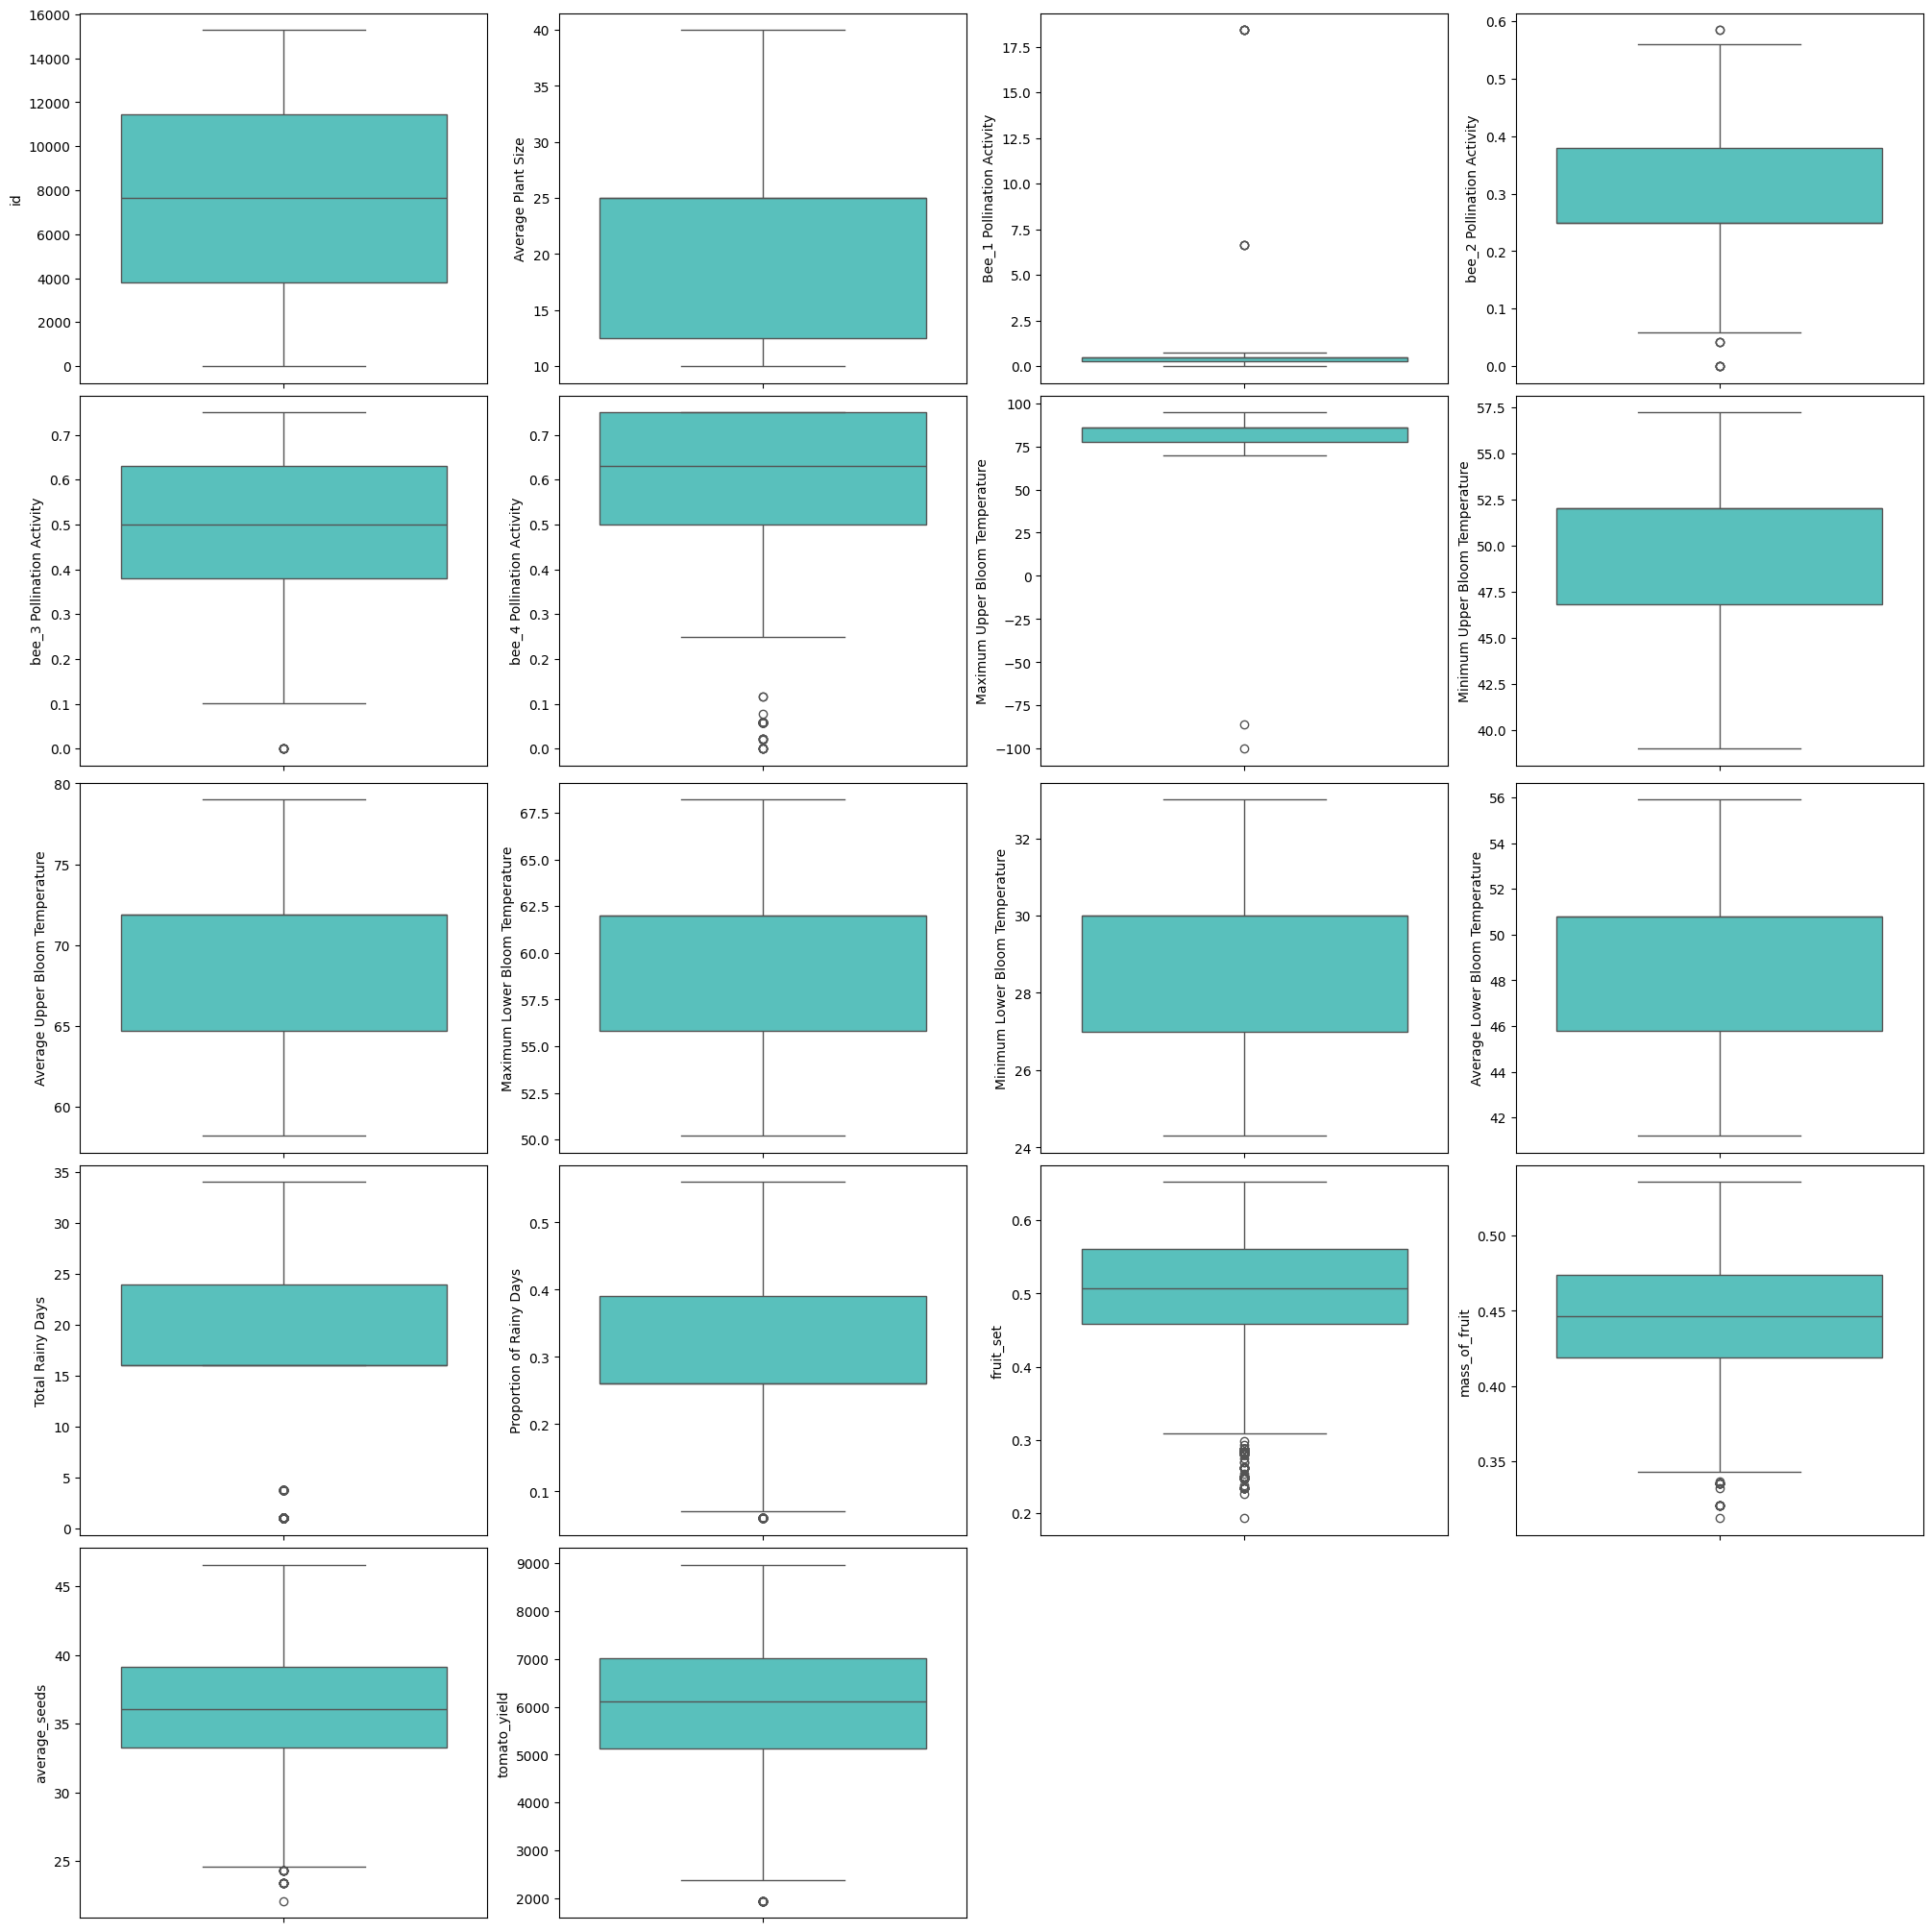

In [205]:
#Box Plot
num_plots = len(df.columns)
n_cols = 4  
n_rows = (num_plots + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color = '#48D1CC')
    axes[i].set_ylabel(col)  

# Hide any unused subplot axes
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.show()

### IQR METHOD - 
The Interquartile Range (IQR) quantifies the spread of the middle 50% of a dataset and is calculated by finding the difference between the third quartile (Q3) and the first quartile (Q1). The first quartile marks the median of the lower half of the data, and the third quartile marks the median of the upper half. The IQR, thus, describes the range within which the bulk of the data lies and is particularly useful because it is less influenced by outliers than other measures such as the mean or standard deviation, making it a reliable indicator of data variability.

Usally as we said the IQR takes the 50% in the middle, for us it didnt work, there were too many outliers(20% of The Data), so we picked the 80% in the middle. 

### IQR OVER Z-SCORE:
* "IQR is the most trusted approach used in the research field" - from the article above
* To find the outliers, We'll use the IQR method, which doesn't rely on normalized data.
* [Exploring Z-Score and IQR Methods for Boxplots](https://medium.com/@ayeshasidhikha188/unveiling-outliers-exploring-z-score-and-iqr-methods-for-boxplots-67b0f3086720)

In [206]:
def detect_outliers_iqr(df):
    outlier_dict = {}  # To store outliers and their counts for each column
    for column in df.columns:  
        q1 = df[column].quantile(0.10)
        q3 = df[column].quantile(0.90)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not outliers.empty:
            outlier_dict[column] = {'outliers': outliers.tolist(), 'count': len(outliers)}
        else:
            outlier_dict[column] = {'outliers': "No outliers detected", 'count': 0}

    return outlier_dict

outliers_dict = detect_outliers_iqr(df)

print("Number of Outliers from IQR method:")
for column, info in outliers_dict.items():
    print(f"{column}: {info['count']}")

# Ask the user if they want to see the outliers
user_input = input("Do you want to see the outliers for each column? (yes/no): ").strip().lower()

if user_input == "yes":
    for column, info in outliers_dict.items():
        print(f"Outliers from IQR method for {column}: {info}")
else:
    print("Outliers display skipped.")


Number of Outliers from IQR method:
id: 0
Average Plant Size: 0
Bee_1 Pollination Activity: 8
bee_2 Pollination Activity: 10
bee_3 Pollination Activity: 0
bee_4 Pollination Activity: 56
Maximum Upper Bloom Temperature: 2
Minimum Upper Bloom Temperature: 0
Average Upper Bloom Temperature: 0
Maximum Lower Bloom Temperature: 0
Minimum Lower Bloom Temperature: 0
Average Lower Bloom Temperature: 0
Total Rainy Days: 0
Proportion of Rainy Days: 0
fruit_set: 0
mass_of_fruit: 0
average_seeds: 0
tomato_yield: 0


Do you want to see the outliers for each column? (yes/no):  no


Outliers display skipped.


In [209]:
def remove_outliers(df):
    for column in df.columns:
            q1 = df[column].quantile(0.10)
            q3 = df[column].quantile(0.90)
            IQR = q3 - q1
            lower_bound = q1 - 1.5 * IQR
            upper_bound = q3 + 1.5 * IQR

            # Keep only the rows without outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df)

print(df_cleaned.shape)

(15228, 18)


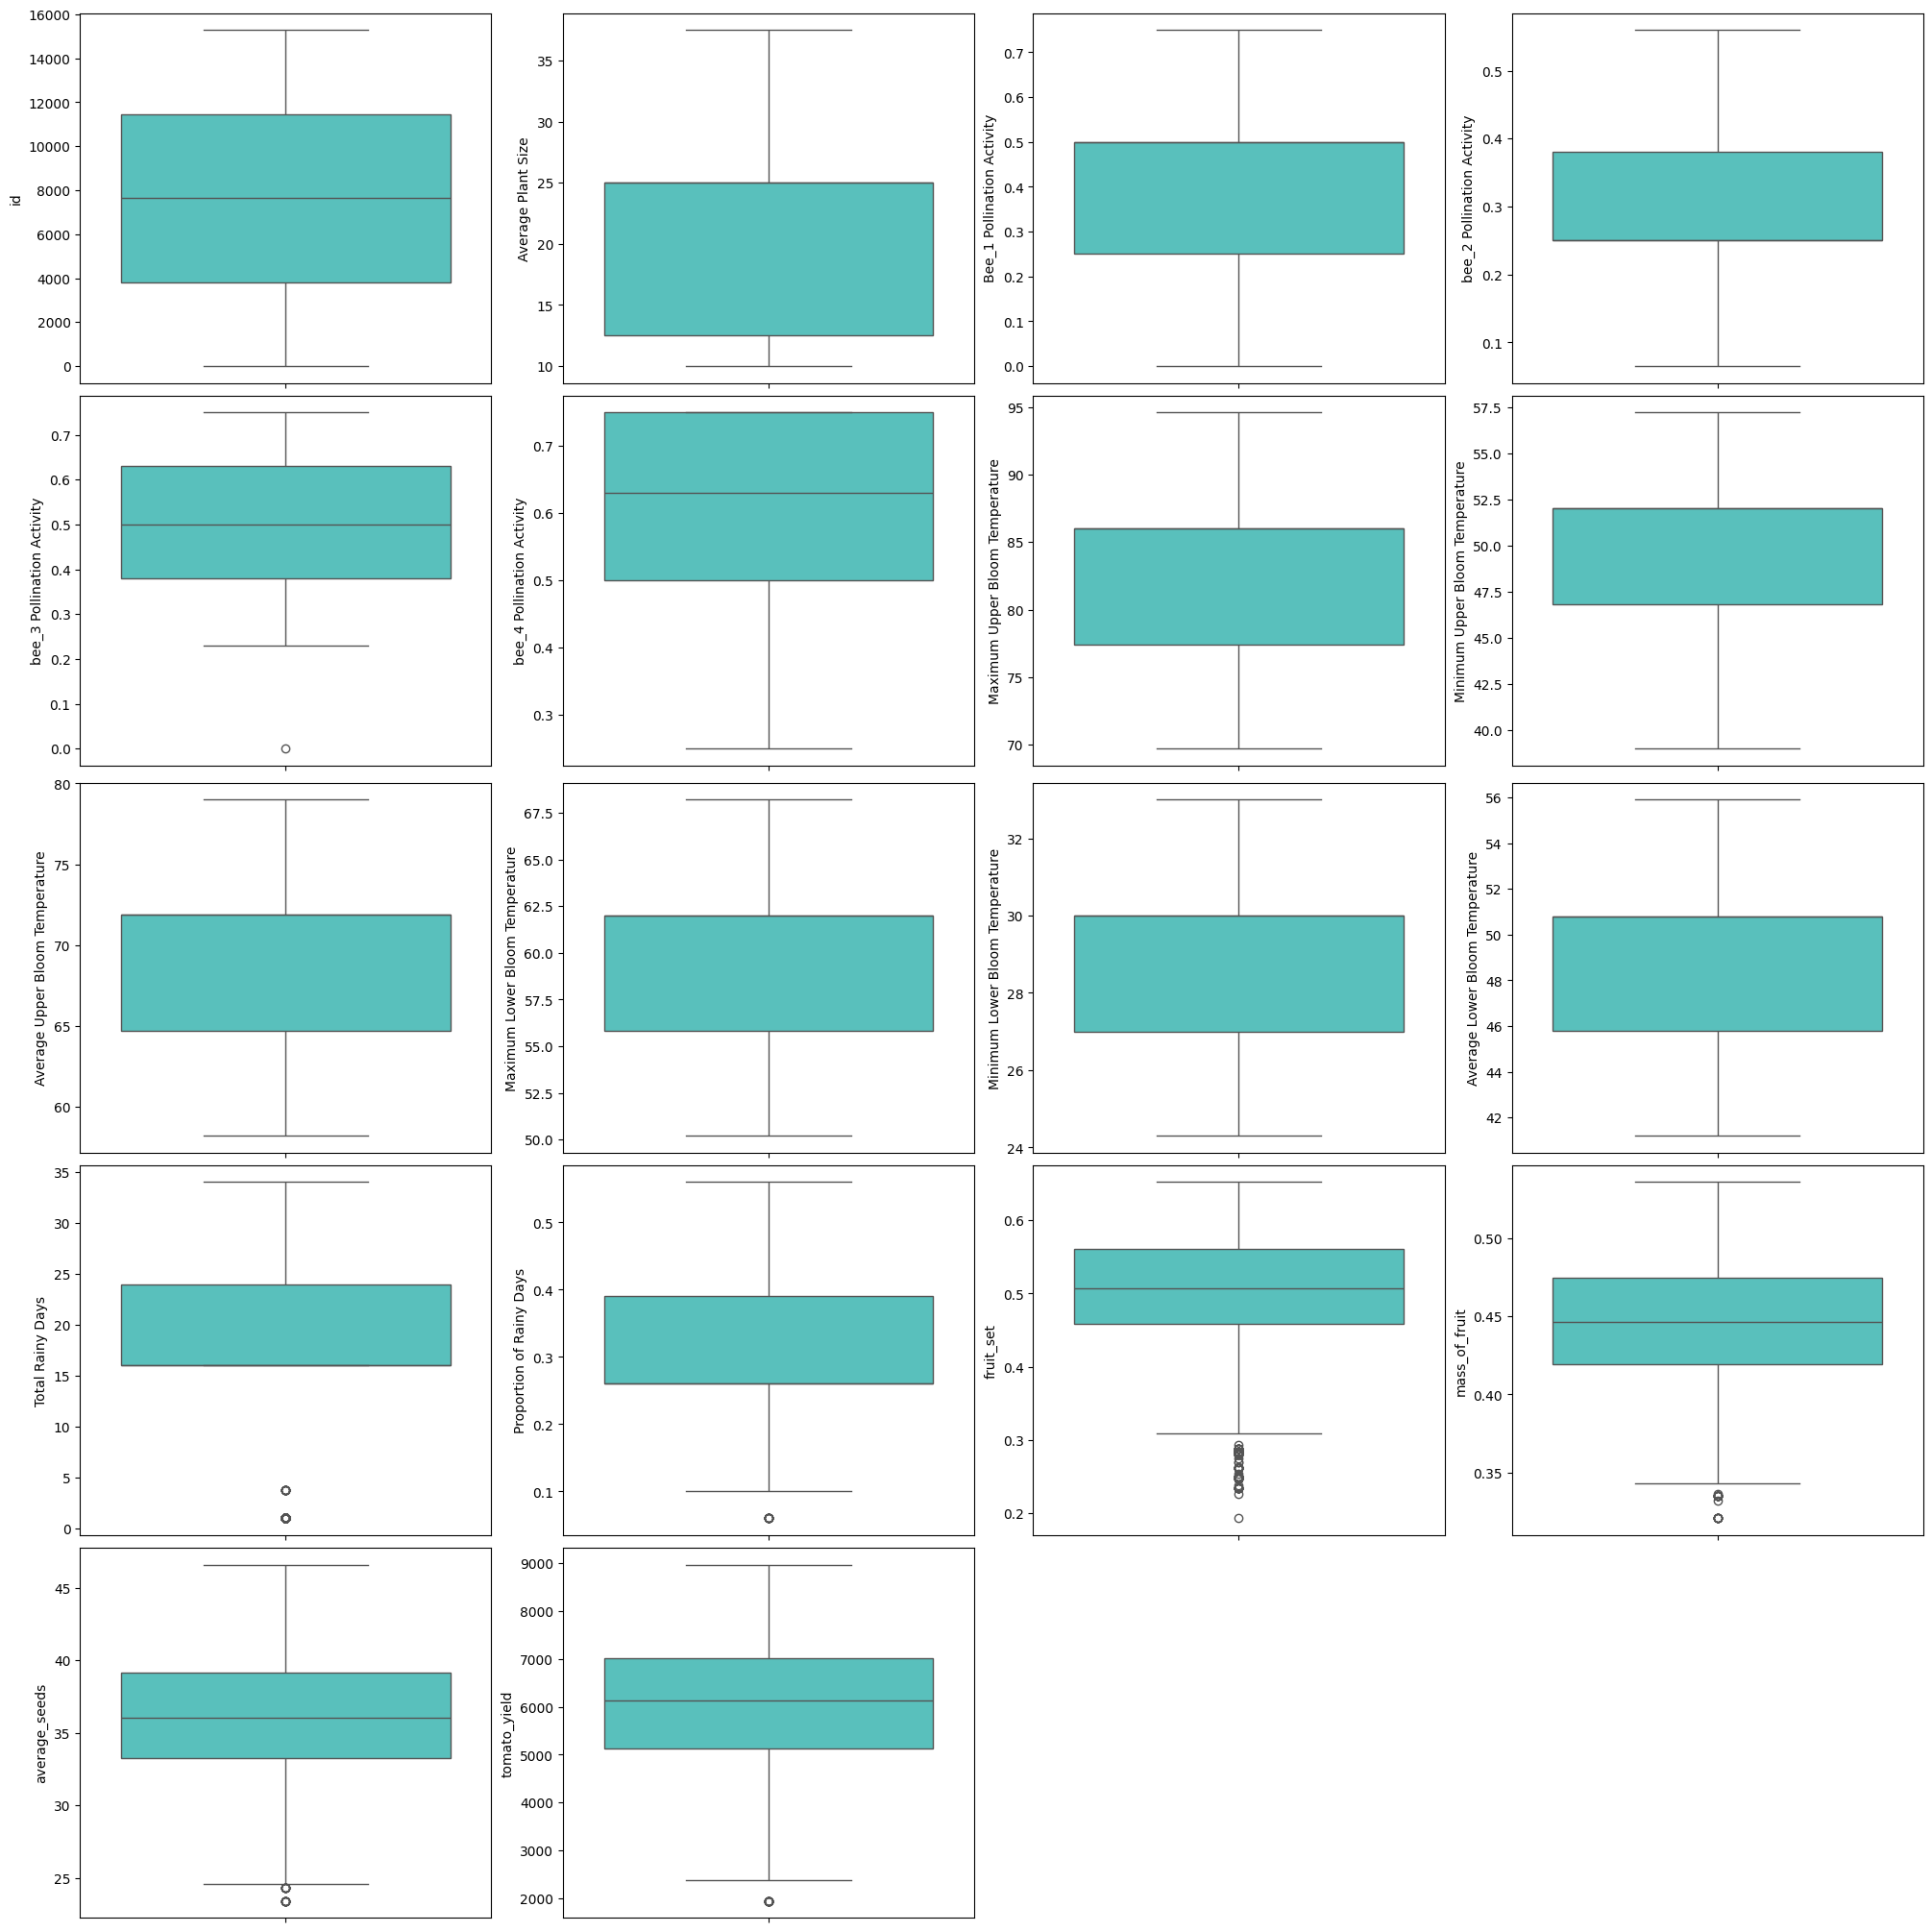

In [210]:
num_plots = len(df_cleaned.columns)
n_cols = 4 
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color = '#48D1CC')
    axes[i].set_ylabel(col)  # Set y-axis label to the column name

# Hide any unused subplot axes
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.show()

when we take outliers in such a big gap(25-75), we can see that about 20% of our data is an outlier, which doesnt make sense, thus we take 10 - 90. In the boxplot we see the outliers of the (25-75) gap.

# Normalization
[How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

In [211]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_cleaned)
print(scaled)

[[0.00000000e+00 5.45454545e-01 6.66666667e-01 ... 4.50456787e-01
  3.90470514e-01 3.60382582e-01]
 [6.54107797e-05 5.45454545e-01 6.66666667e-01 ... 4.71421364e-01
  4.50776490e-01 5.12906812e-01]
 [1.30821559e-04 9.09090909e-02 3.33333333e-01 ... 6.98475597e-01
  6.44260018e-01 7.01073073e-01]
 ...
 [9.99869178e-01 5.45454545e-01 6.66666667e-01 ... 4.46921544e-01
  3.83486833e-01 3.91652016e-01]
 [9.99934589e-01 5.45454545e-01 6.66666667e-01 ... 5.27630034e-01
  5.72297529e-01 6.87285217e-01]
 [1.00000000e+00 5.45454545e-01 6.66666667e-01 ... 5.85523787e-01
  5.04133919e-01 5.58447967e-01]]


# Correlation between variables
after handaling our data we'll chck for correlations:
* Just because two things are related doesn’t mean one causes the other. There might be something  that's affecting both.
There could be a different type of relationship, like a curve.

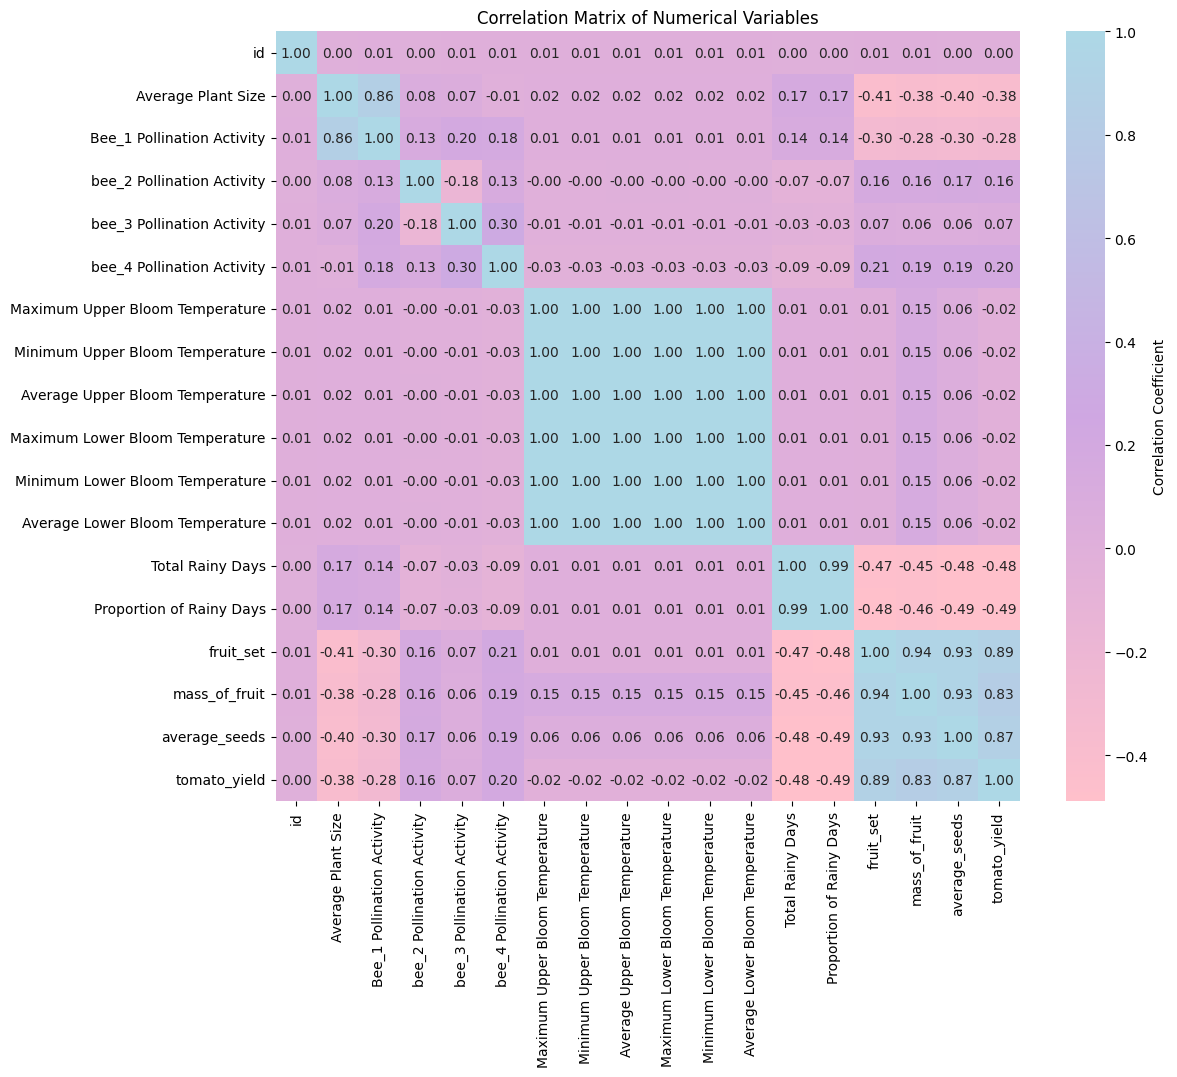

In [212]:
from matplotlib.colors import LinearSegmentedColormap 
correlation_matrix = df_cleaned.corr()

# Define custom colors for the heatmap
colors = ["pink", "#cfa7e2", "lightblue"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Correlation Matrix of Numerical Variables')
plt.show()


* There is a strong correlation between all the 6 tempureture features.
  we can understand that we may not need all the 6 features because we gather from them very    similair information.
* Also, There is a strong correlation between 'Total Rainy Days' and 'Proportion of Rainy Days' they are 99% correlated, which makes us wonder -> maybe we dont need them both.
* There is also high correlation between Fruit Set, Mass of Fruit, Average Seeds and tomato yeild which can imply that those features Contribute the most information in order to predict the tomato yields.


In [213]:
correlation_matrix = df.corr()
tomato_yield_correlations = correlation_matrix['tomato_yield']
tomato_yield_correlations

id                                 0.000975
Average Plant Size                -0.382619
Bee_1 Pollination Activity        -0.118001
bee_2 Pollination Activity         0.161145
bee_3 Pollination Activity         0.073969
bee_4 Pollination Activity         0.198264
Maximum Upper Bloom Temperature   -0.021274
Minimum Upper Bloom Temperature   -0.021929
Average Upper Bloom Temperature   -0.021401
Maximum Lower Bloom Temperature   -0.022197
Minimum Lower Bloom Temperature   -0.022319
Average Lower Bloom Temperature   -0.022081
Total Rainy Days                  -0.477191
Proportion of Rainy Days          -0.483870
fruit_set                          0.885967
mass_of_fruit                      0.826481
average_seeds                      0.868853
tomato_yield                       1.000000
Name: tomato_yield, dtype: float64

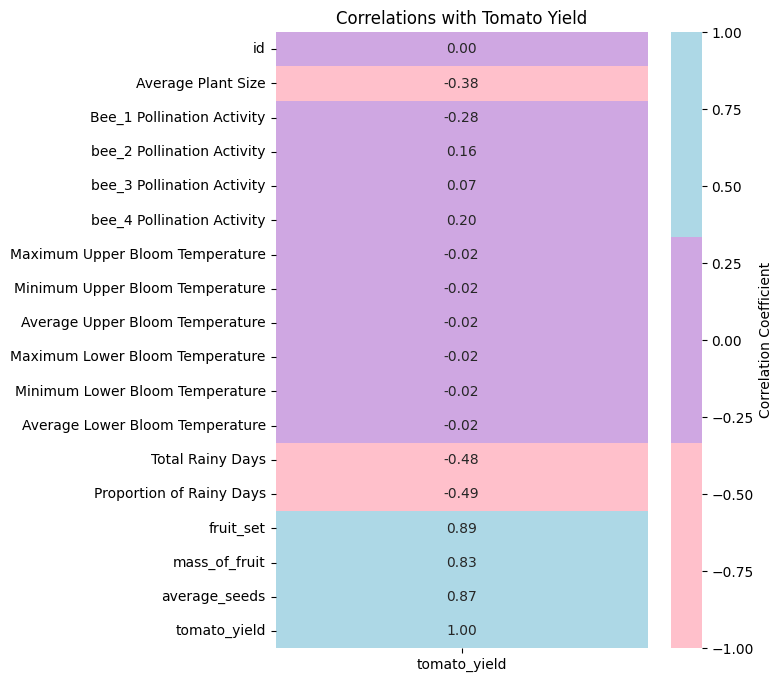

In [214]:
#HEATMAP -> WITH RELATION TOO TOMATO YIELD
colors = ["pink", "#cfa7e2", "lightblue"]
correlation_matrix = df_cleaned.corr()

tomato_yield_correlations = correlation_matrix[['tomato_yield']]  

plt.figure(figsize=(6, 8)) 
heatmap = sns.heatmap(tomato_yield_correlations, annot=True, cmap= colors, vmin=-1, vmax=1, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_title('Correlations with Tomato Yield')
plt.show()

# Visualization of our Data in Relation to tomato yield

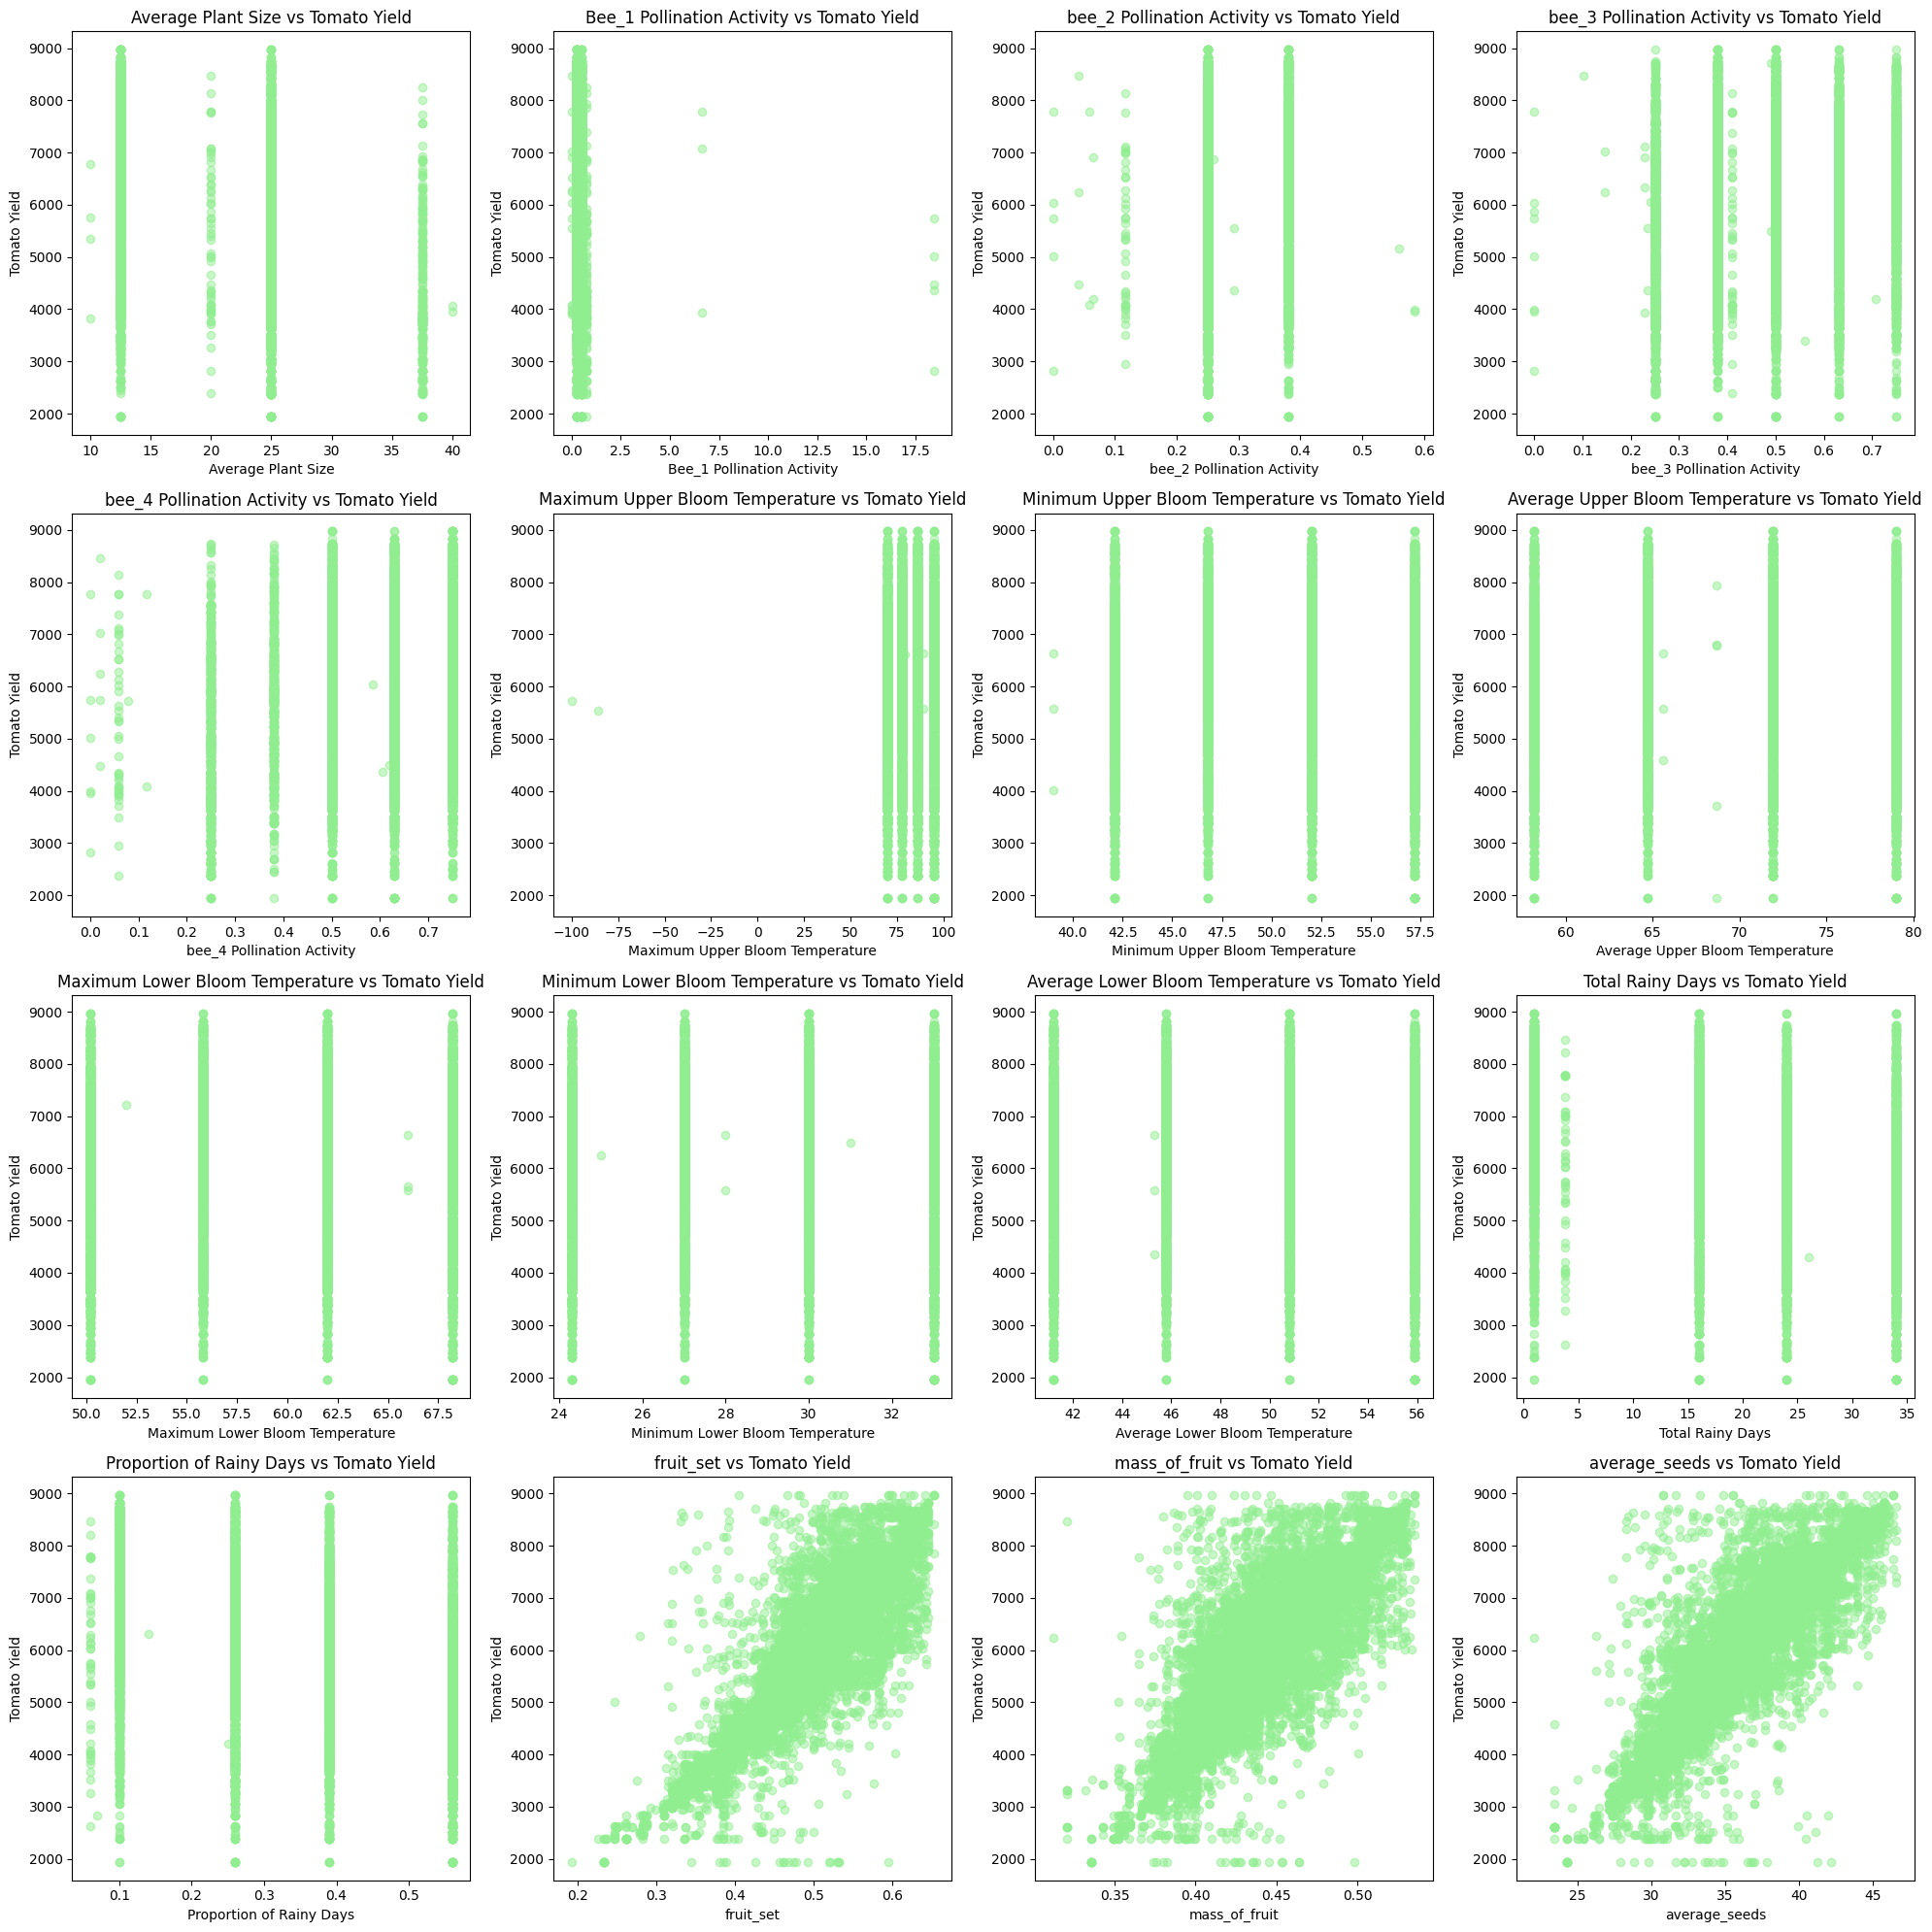

In [215]:
features = df.columns.drop(['tomato_yield', 'id'])

rows = (len(features) + 3) // 4 
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, rows * 5))
axes = axes.flatten()  

# Plotting each feature against tomato_yield
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['tomato_yield'], alpha=0.5, color="#90ee90")
    axes[i].set_title(f'{feature} vs Tomato Yield')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Tomato Yield')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Insights from visualization and correlation:
* ### Pollination Activity - Bee_1, Bee_2, Bee_3, Bee_4 :
  * correlations: -0.27 to 0.17
  * we can learn that this data is reletavily low with tomato yield, but we will check it out.
* ### Temperature Variables - Maximum, Minimum, Average :
  * correlations: -0.04 to -0.03
  * These plots indicate that yields are relatively consistent across a wide range of temperatures, This suggests that temperature
    changes don’t have a big impact on how many tomatoes are produced.
* ### Rainy Days - Total and Proportion :
  * correlations: -0.41
  * We can also notice a negative correlation between tomato yield - 'Total Rainy Days' and 'Proportion of Rainy Days' which means that rainy days hurts the tomato growing. 
* ### Fruit Set, Mass of Fruit, Average Seeds :
  * correlations: 0.88, 0.81, 0.87
  * Here we can see a strong correlation, indicates that these factors are important for getting more tomatoes.
* ### Average plant size
  * correlation: -0.35
  * The average plant size have negative correlation with tomato yield, which means that as the plant size is bigger, the tomato yield is worse.   

Our main subject is the tomato yield, thus, we expect to see a connection between the bees pollination activity and the temperatures to the tomato yield ,however we see that there is no clear correlation between them. the correlation matrix test only linear connection, we will check if their is a non linear connection between them with the boxplot

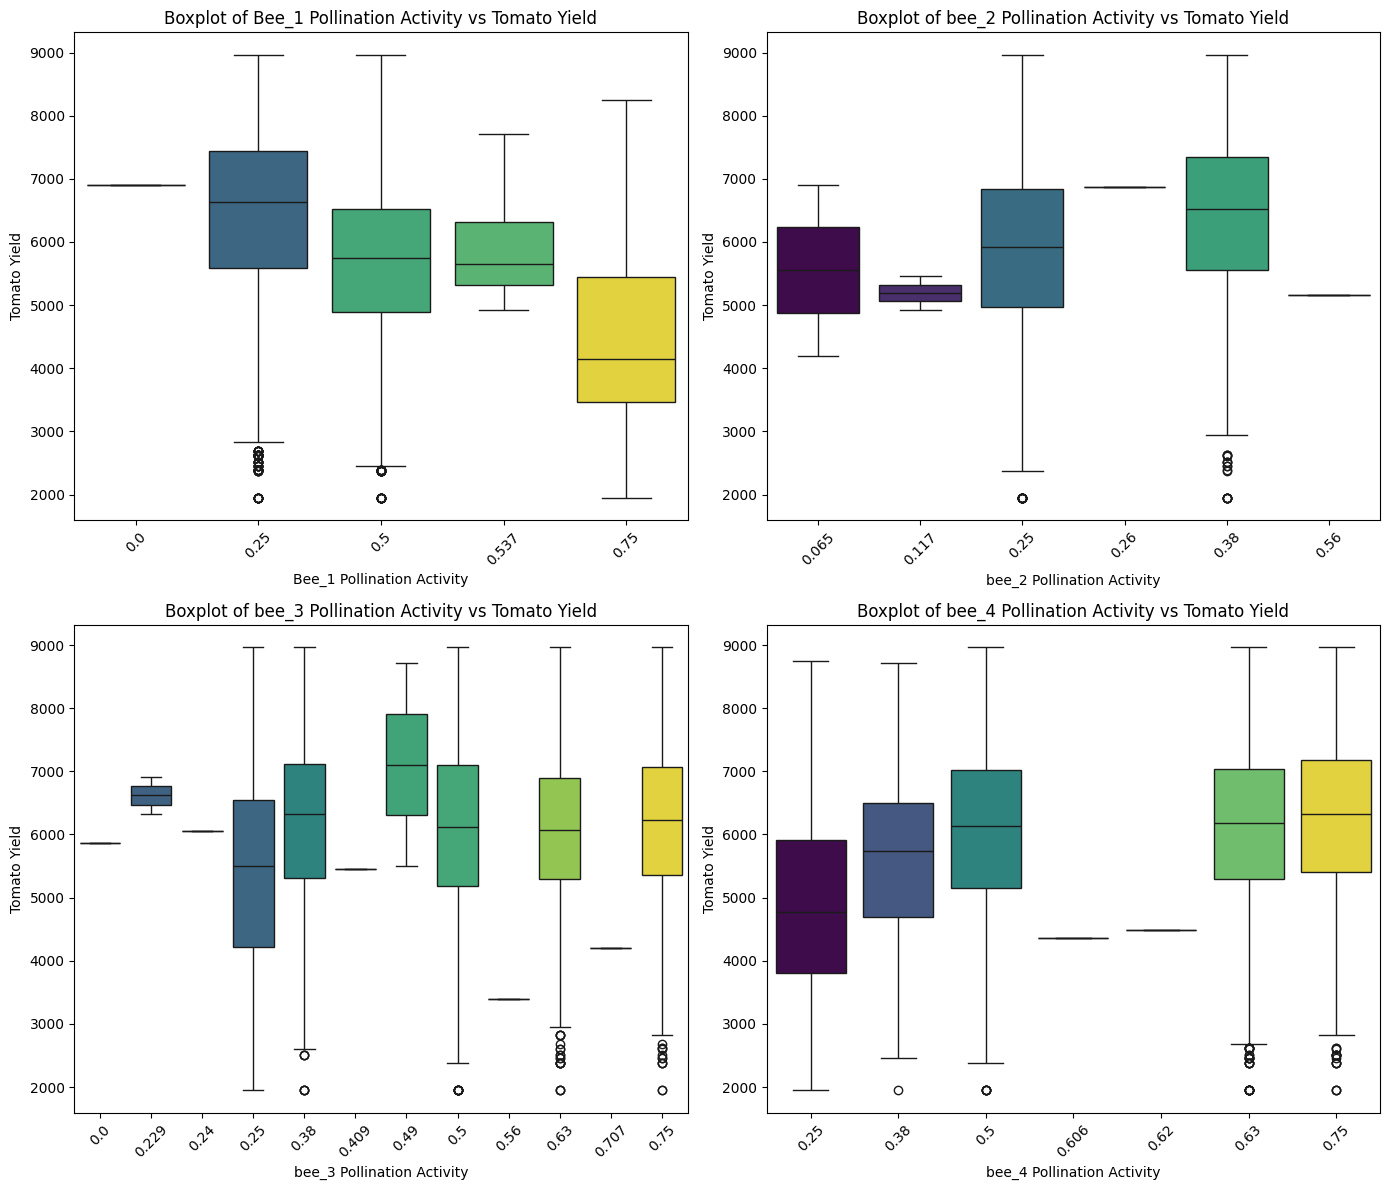

In [216]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12)) 
bee_activities = ['Bee_1 Pollination Activity', 'bee_2 Pollination Activity', 'bee_3 Pollination Activity', 'bee_4 Pollination Activity']

for i, bee_activity in enumerate(bee_activities):
    row, col = divmod(i, 2)  # Determine the row and column to place the subplot
    sns.boxplot(x=bee_activity, y='tomato_yield', hue=bee_activity, data=df_cleaned, ax=axes[row, col], palette='viridis' ,legend=False)
    axes[row, col].set_title(f'Boxplot of {bee_activity} vs Tomato Yield')
    axes[row, col].set_xlabel(bee_activity)
    axes[row, col].set_ylabel('Tomato Yield')
    axes[row, col].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()


Conclusions:
* We see that most of the time when Bee1 pollination is higher,the tomato yield is worse, and the opposite for Bee4, when the pollination is higher, the tomato yield is better
* bee_2 Pollination Activity + bee_3 Pollination Activity , we can see that therre is not strong conection, nither negative or positive.

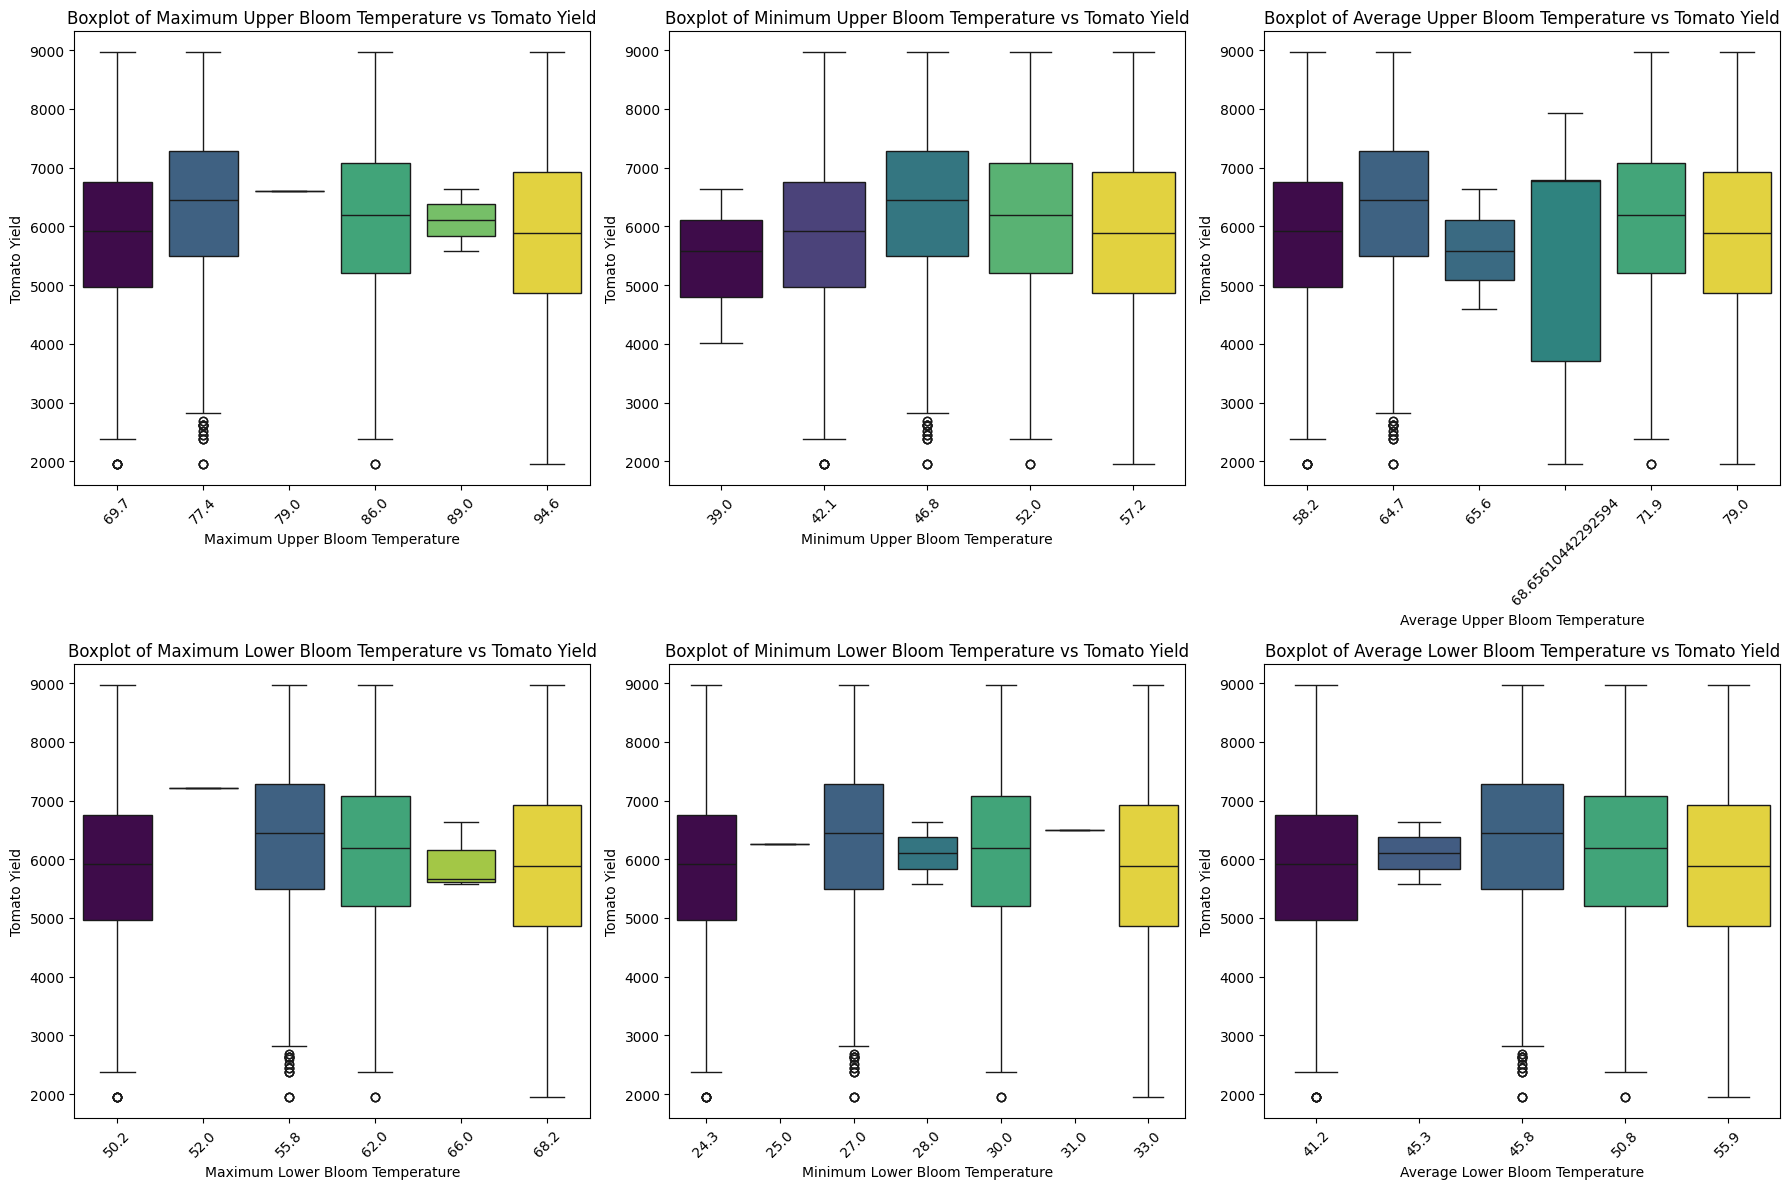

In [217]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
temperature_variables = [
    'Maximum Upper Bloom Temperature',
    'Minimum Upper Bloom Temperature',
    'Average Upper Bloom Temperature',
    'Maximum Lower Bloom Temperature',
    'Minimum Lower Bloom Temperature',
    'Average Lower Bloom Temperature'
]

for i, temp_var in enumerate(temperature_variables):
    row, col = divmod(i, 3)  
    sns.boxplot(x=temp_var, y='tomato_yield', hue=temp_var, data=df_cleaned, ax=axes[row, col], palette='viridis', legend=False)
    axes[row, col].set_title(f'Boxplot of {temp_var} vs Tomato Yield')
    axes[row, col].set_xlabel(temp_var)
    axes[row, col].set_ylabel('Tomato Yield')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout() 
plt.show()


We dont see a strong connection between the tomato yield and the temperature - not postive or negative, it doesnt have a big effect on the tomato yield.

## now lets plot some visualizations of our data: 
we want to seperate discrette and continous features and show their disterbutions

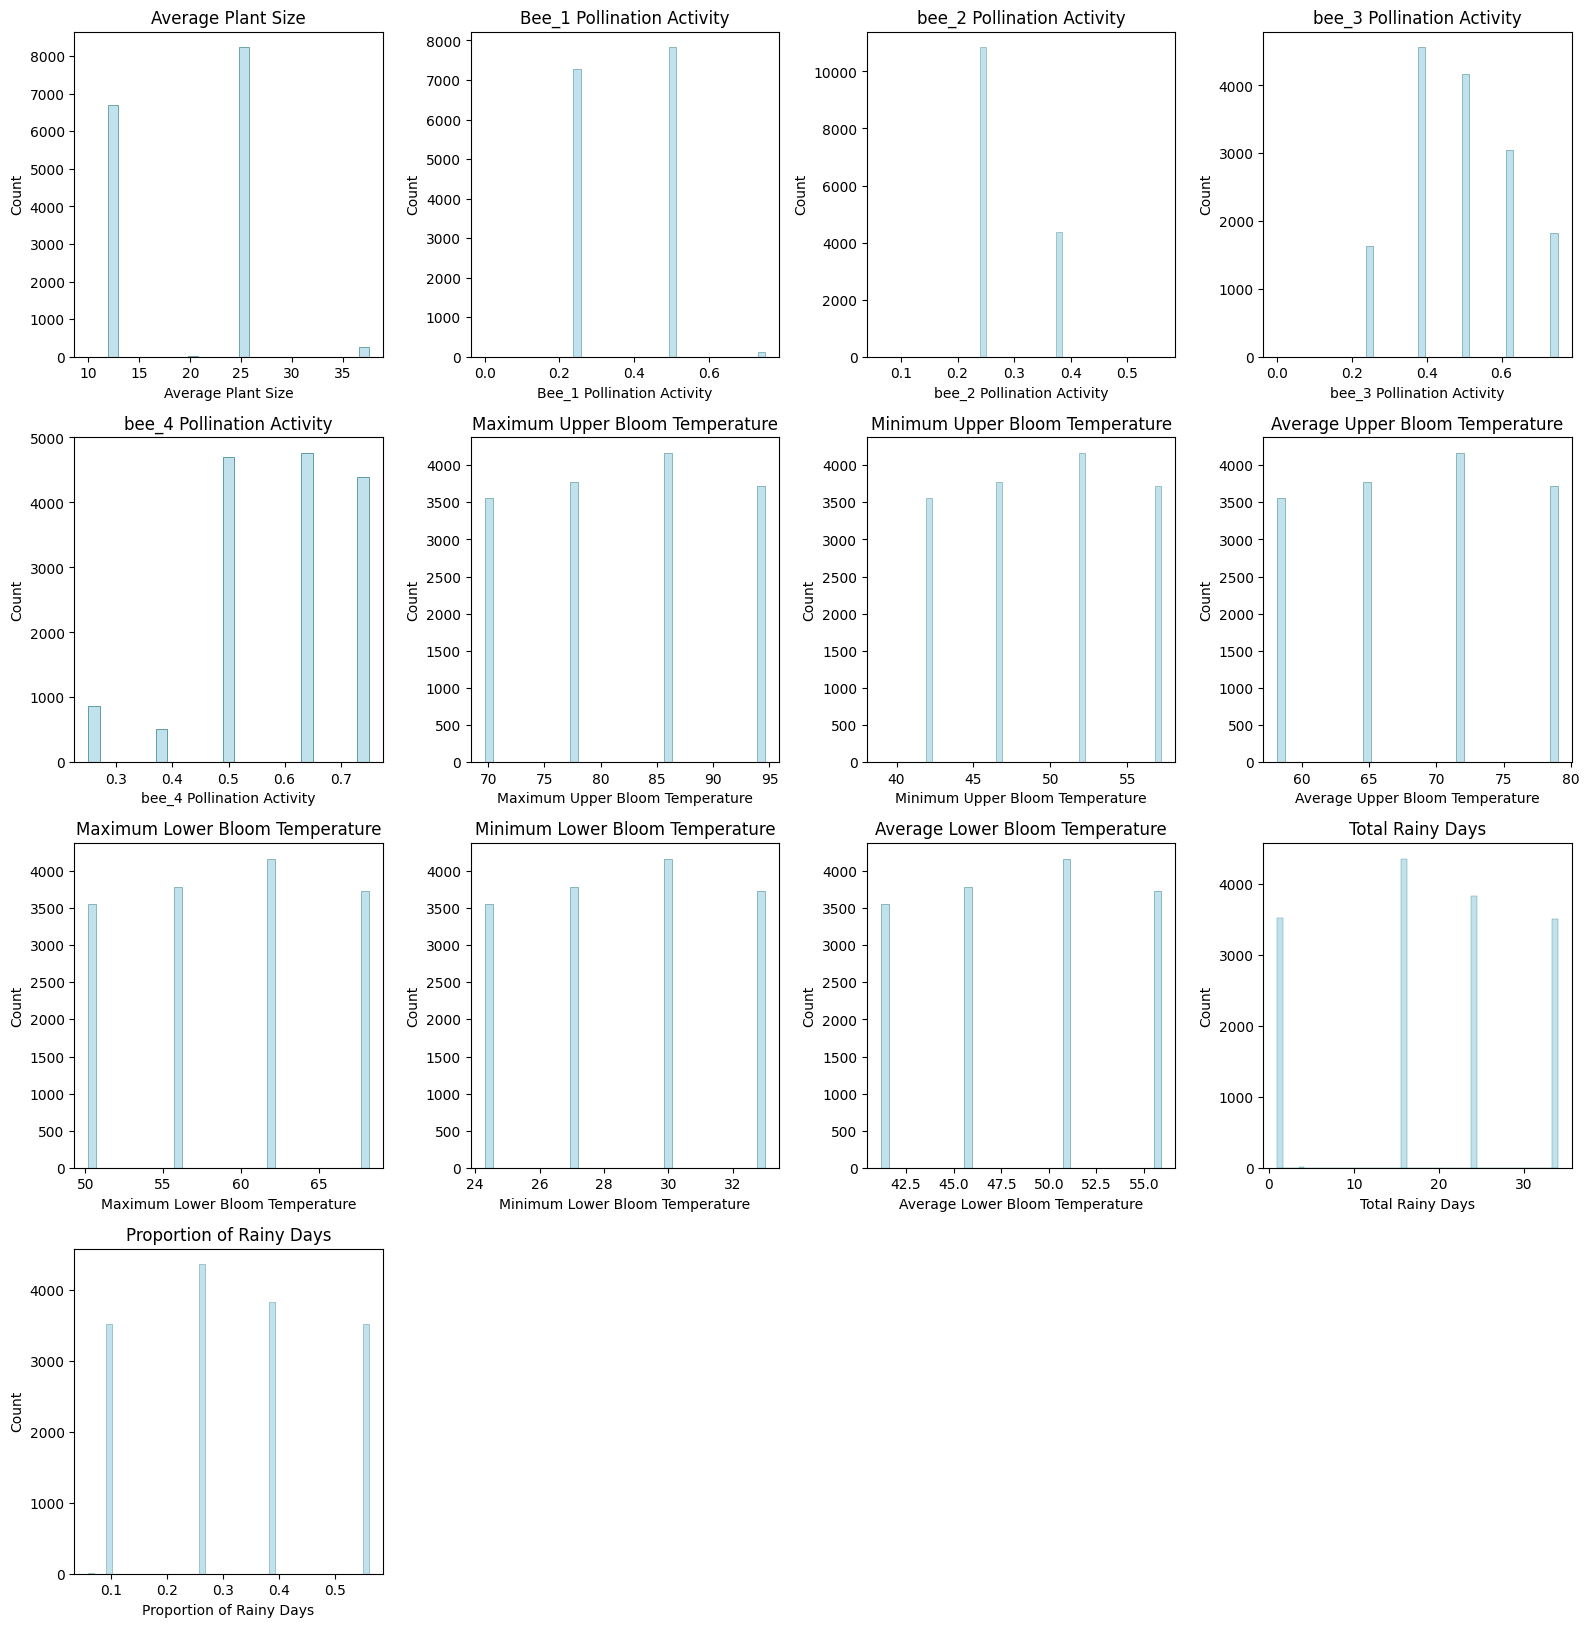

In [218]:
num_features = len(df_cleaned.columns) - 1  
num_cols = min(num_features, 4)
num_rows = (num_features - 1) // num_cols + 1

plt.figure(figsize=(num_cols * 4, num_rows * 4))
for i, column in enumerate(df_cleaned.columns[1:14]):  #exclude id
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_cleaned[column], kde=False, color='#add8e6', edgecolor='#5f9ea0')
    plt.title(column)
plt.tight_layout()
plt.show()


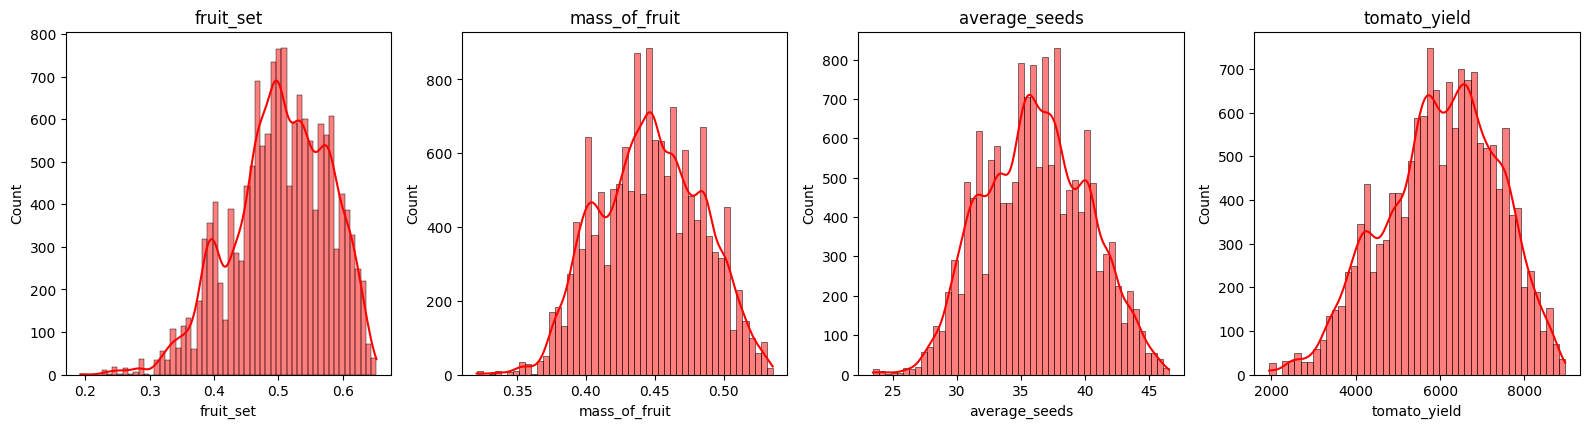

In [219]:
plt.figure(figsize=(num_cols * 4, num_rows * 4))
for i, column in enumerate(df_cleaned.columns[14:18]):  
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_cleaned[column], kde=True, color='red')
    plt.title(column)
plt.tight_layout()
plt.show()

We see that indeed after the normalization the distributions looks normal, also we notice the distributions are similar.